In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Context

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# 1. Exploratory Statistics/ Description of the Dataset

In [28]:
df=pd.read_csv("creditcard.csv")
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

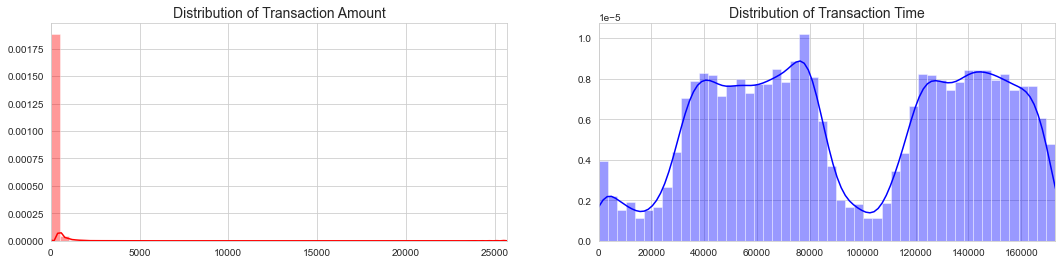

In [31]:
fig, ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [33]:
df['Amount'].nunique()

32767

The Data is already pre-processed and went through a PCA transformation

The data is already pre-processed => there is no empty cells and all of the data entries are of the type float64

There are 31 variables

The data type of all the input variables is float64 whereas the data type of out variable (Class) is int64. Therefore, there are lots of unique values in each column. 

In [34]:
stats.spearmanr(df[['Amount','Class']])

SpearmanrResult(correlation=-0.008338853912812888, pvalue=8.575839442748602e-06)

The Amount and the class are negatively weakly correlated at a signficant level. We use the Spearman correlation because we are establishing a correlation between cordinal data and binary data

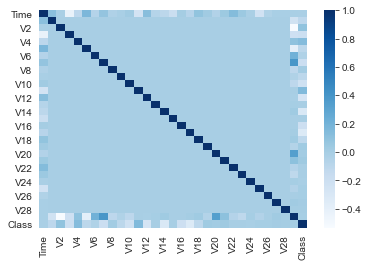

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

V2,V4 and V11 seem to be correlated with Class by 0.2 

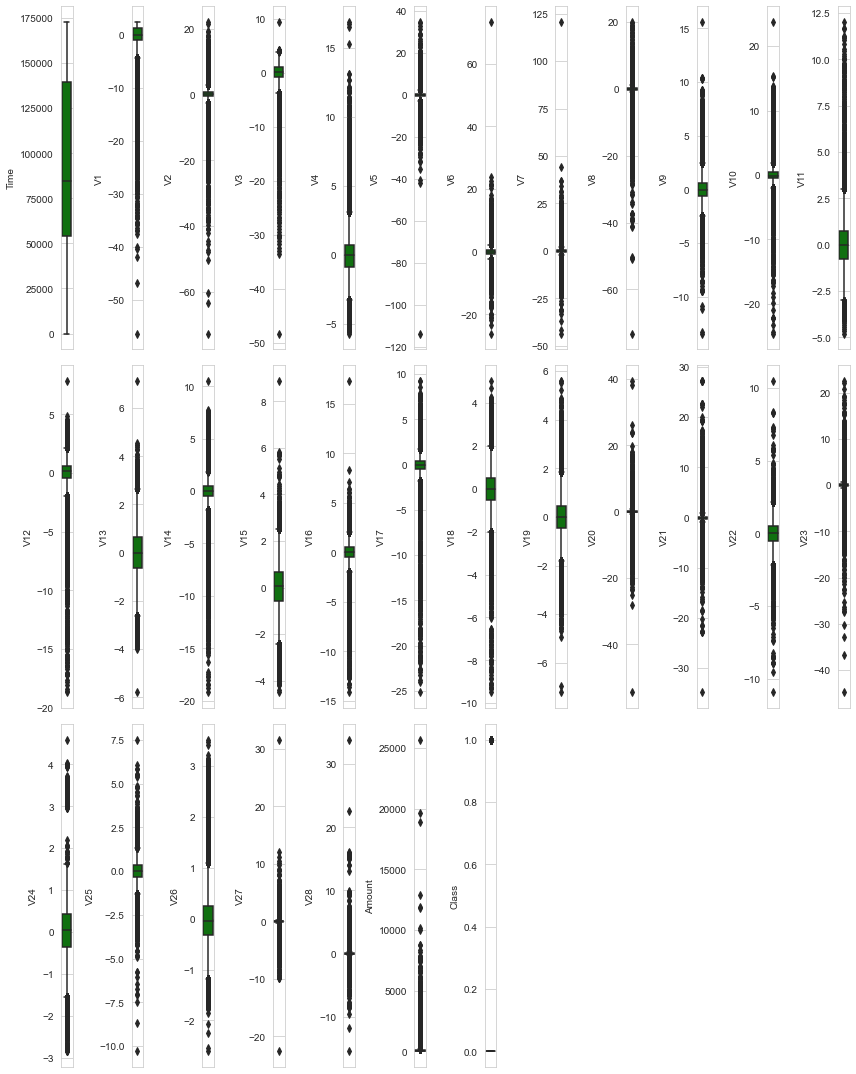

In [36]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows +1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

Except for time, all of the variables show outliers

C:\Users\User1\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


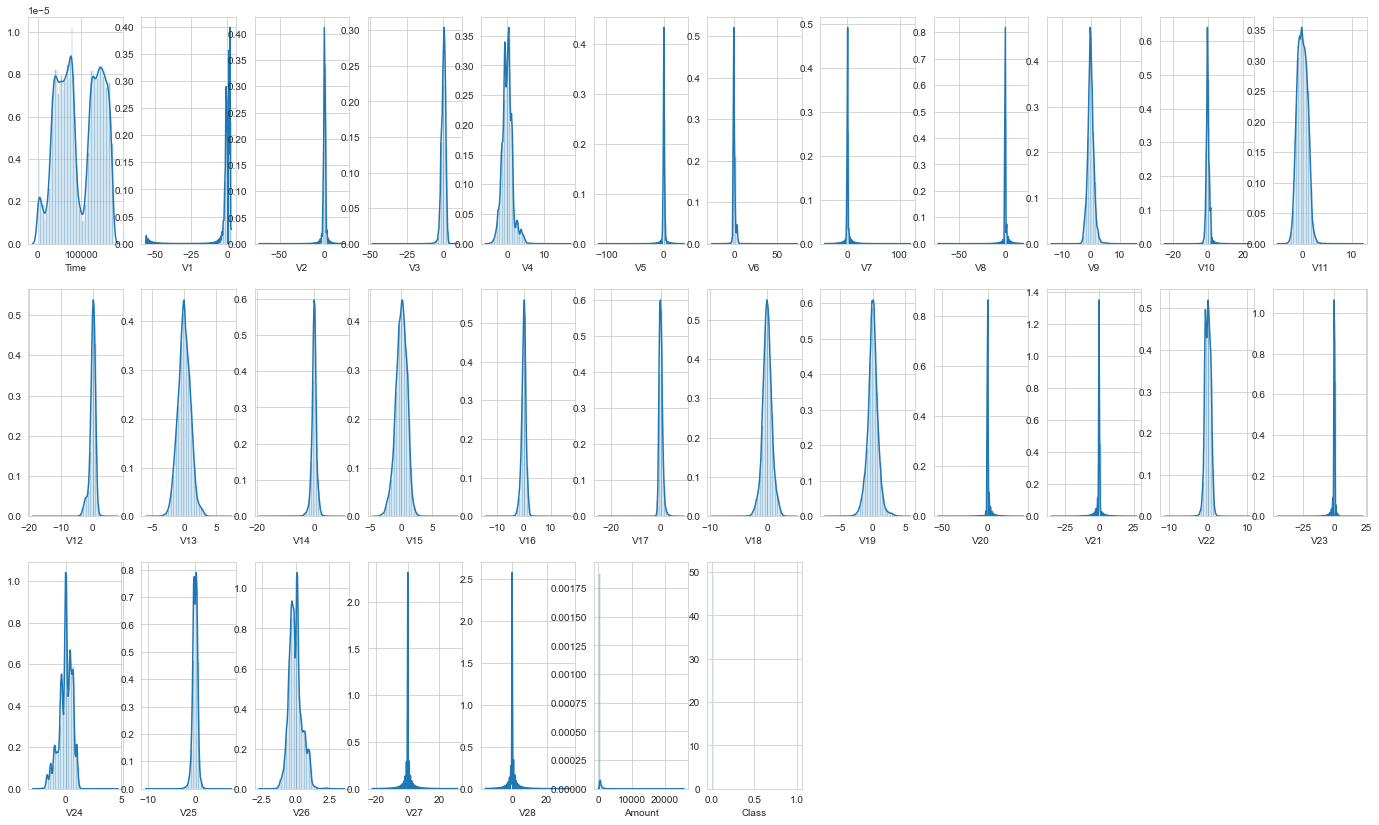

In [37]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

Amount is heavily skewed to the right, V1 is skewed to the left and V13 seems to be normally distributed 

# 2. Balanced vs Imbalanced

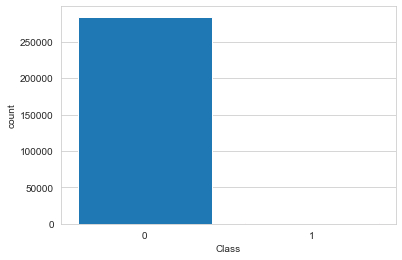

In [38]:
df_y=df['Class']
df_x=df.drop(['Class'],axis=1)
sns.countplot(df_y, saturation = 1)

In [51]:
df_y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

The data is disproportionately present in the non-fraud (0) class than in the fraud class (1), 
therefore we will adjust the logistic and KNN classification construction to reflect that reality

The problem is: 
Many machine learning models will tend to predict towards the class that is more often represented

Strategy: 

- Logistic Regression => class_weight = 'balanced'
- Not consider Accuracy but rather Recall, Precision and F1-score
- KNN not sensitive to dataset imbalances

# 3. Logistic Regression method

# Split Training and Test data

In [39]:
X_train, X_test, y_train, y_test=train_test_split(df_x,df_y,
                                                      stratify=df_y, random_state=42)

In [40]:
print(y_train, "\n\n", y_test)

17884     0
232246    0
208554    0
11464     0
109718    0
         ..
233802    0
85418     0
29062     0
13766     0
17677     0
Name: Class, Length: 213605, dtype: int64 

 39041     0
205217    0
34398     0
93103     0
19341     0
         ..
36696     0
177275    0
100390    0
187139    0
252018    0
Name: Class, Length: 71202, dtype: int64


# Logistic Regression adapted to Unbalanced Data

In [41]:
# Define logistic regression model, with balacing classes option
clf = LogisticRegression(solver="newton-cg",penalty="l2",C=10,random_state=42, class_weight='balanced')

# Train logistic regression model
model = clf.fit(X_train, y_train)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


The model is adjusted for imbalanced datasets with the class_weight option

# Classification report : Accuracy in terms of recall and Precision

In [42]:
# Compute the predictions of the trained model on the test set
predictions = clf.predict(X_test)

# print the classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



The threshold of prediction by default here is 0.5 for the logistic regression

# 5. Confusion Matrix

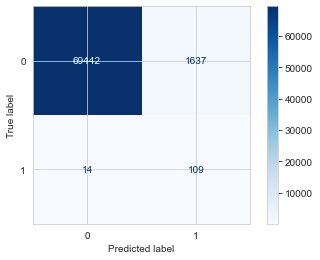

In [43]:
plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)

We want to minimize the false negatives so that the predictive power detects fraud  in a more accurate way

# 6. Plot recall and precision AUC curves

In [44]:
roc_auc_score(y_test, predictions)

0.9315740747412962


 ROC_AUC_CURVE


 ROC AUC SCORE: 0.93




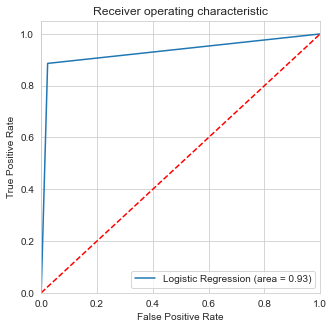

In [45]:
print('\n ROC_AUC_CURVE\n')
logit_roc_auc = roc_auc_score(y_test, predictions)
print('\n ROC AUC SCORE: %0.2f' % logit_roc_auc)
print('\n')
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=1)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


This is a good classifier => there is almost a 93% chance that the classifier will choose the right category=> the linear shape is random and should be as close from it as possible. 

In the following section, we will repeat the same process for the KNN method. In order to do so, we will first determine the optimal k parameter

# 7. Choice of optimal K parameter 

In [46]:
# we will plot accuracy on test data for K values in the following array
K_param = [1,3,5,7,9,11,13]


# Define a list in which we write the accuracies
acc_test_K = []
acc_train_K = []
class_rep_K = []

print("\nAccuracy on test data: \n")

for K in K_param:    
    
    neigh_K = KNeighborsClassifier(n_neighbors=K,metric='euclidean') # euclidean is the distance used 
    neigh_K.fit(X_train, y_train)
    
    pred_test = neigh_K.predict(X_test)
    pred_train = neigh_K.predict(X_train)

    correct_pred_test = pred_test==y_test
    correct_pred_train = pred_train==y_train

    num_correct_pred_test = np.sum(1.0*correct_pred_test)
    accuracy_test = 100*num_correct_pred_test/len(y_test)
    
    num_correct_pred_train = np.sum(1.0*correct_pred_train)
    accuracy_train = 100*num_correct_pred_train/len(y_train)
    
    class_recall=classification_report(y_test,pred_test)
    
    acc_test_K.append(accuracy_test)
    acc_train_K.append(accuracy_train)
    class_rep_K.append(class_recall)
    print("For K = {}, {} correct prediction out of {} train samples. Accuracy: {:0.2f}".format(K,num_correct_pred_train,len(y_train),accuracy_train))
    print("For K = {}, {} correct prediction out of {} test samples. Accuracy: {:0.2f}".format(K,num_correct_pred_test,len(y_test),accuracy_test))
    print(class_recall)
    print()
    


Accuracy on test data: 

For K = 1, 213605.0 correct prediction out of 213605 train samples. Accuracy: 100.00
For K = 1, 71065.0 correct prediction out of 71202 test samples. Accuracy: 99.81
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.39      0.20      0.27       123

    accuracy                           1.00     71202
   macro avg       0.69      0.60      0.63     71202
weighted avg       1.00      1.00      1.00     71202


For K = 3, 213300.0 correct prediction out of 213605 train samples. Accuracy: 99.86
For K = 3, 71088.0 correct prediction out of 71202 test samples. Accuracy: 99.84
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.91      0.08      0.15       123

    accuracy                           1.00     71202
   macro avg       0.95      0.54      0.57     71202
weighted avg       1.00      1.00      1.00

C:\Users\User1\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For K = 11, 213247.0 correct prediction out of 213605 train samples. Accuracy: 99.83
For K = 11, 71079.0 correct prediction out of 71202 test samples. Accuracy: 99.83
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.00      0.00      0.00       123

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202


For K = 13, 213247.0 correct prediction out of 213605 train samples. Accuracy: 99.83
For K = 13, 71079.0 correct prediction out of 71202 test samples. Accuracy: 99.83
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.50      0.01      0.02       123

    accuracy                           1.00     71202
   macro avg       0.75      0.50      0.51     71202
weighted avg       1.00      1.00      1.00     71202




K=1 offers the highest recall score therefore k=1 for the KNN model in the following section

# Model 2. KNN 

In [47]:
neigh_K = KNeighborsClassifier(n_neighbors=1,metric='euclidean') # euclidean is the distance used 
neigh_K.fit(X_train, y_train)
    
pred_test = neigh_K.predict(X_test)


fpr2, tpr2, thresh2 = roc_curve(y_test, pred_test, pos_label=1)

# roc curve for tpr = fpr 

auc_score2 = roc_auc_score(y_test, pred_test)
print(auc_score2)

0.6013516736273173



 ROC_AUC_CURVE


 ROC AUC SCORE: 0.93

 ROC AUC SCORE2: 0.60




<Figure size 360x360 with 0 Axes>

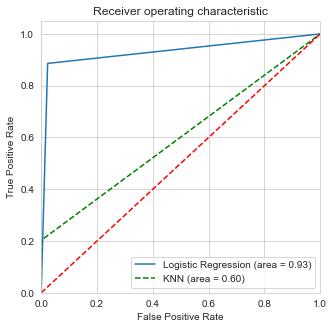

In [48]:
print('\n ROC_AUC_CURVE\n')
logit_roc_auc = roc_auc_score(y_test, predictions)
print('\n ROC AUC SCORE: %0.2f' % logit_roc_auc)
print('\n ROC AUC SCORE2: %0.2f' % auc_score2)
print('\n')
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=1)
plt.figure(figsize=(5,5))
fpr2, tpr2, thresh2 = roc_curve(y_test, neigh_K.predict(X_test), pos_label=1)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN (area = %0.2f)'% auc_score2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

We plot both the AUC curves from the logistic regressiona and the KNN here above. The Logistic regression is a better classifier because its AUC is closer to 1

# 5. Confusion Matrix

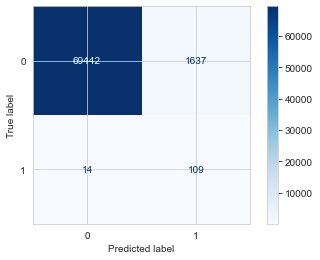

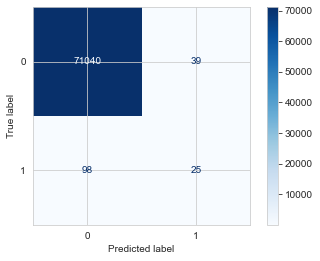

In [49]:
# Logistic regression
plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)

# KNN
plot_confusion_matrix(neigh_K, X_test, y_test,
                                 cmap=plt.cm.Blues)

The Logistic regression classifier performs better than the KNN regarding our goal of fraud detection. Indeed, it only missclassifies real frauds into non-frauds 14 times while the KNN classifiers misses 98 frauds. If the goal was to minimize the number of times our classifier misclassifies non-frauds into frauds, KNN performs much better than the logistic classifier (39 vs 1637)

# 6. Classification report

In [50]:
# Compute the predictions of the trained model on the test set
predictions = clf.predict(X_test)

# print the classification report 
print(classification_report(y_test, predictions))


print()


# Compute the predictions of the trained model on the test set
predictions = neigh_K.predict(X_test)

# print the classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.39      0.20      0.27       123

    accuracy                           1.00     71202
   macro avg       0.69      0.60      0.63     71202
weighted avg       1.00      1.00      1.00     71202



Indeed, the recall score for the logistic classifier is 93% compared to 60% for the KNN classifier. This confirms our previous conclusion